# code to verify the loading of data works 

In [6]:
import pandas as pd

# List of years for which data is available
years = list(range(2000, 2024 + 1))

# Base URL for the Parquet files
base_url = 'https://storage.data.gov.my/transportation/cars_{}.parquet'

# Initialize an empty list to hold DataFrames
data_frames = []

# Loop through each year, read the Parquet file, and append to the list
for year in years:
    url = base_url.format(year)
    df = pd.read_parquet(url)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data = pd.concat(data_frames, ignore_index=True)

# Convert the 'date' column to datetime format if it exists
if 'date' in all_data.columns:
    all_data['date'] = pd.to_datetime(all_data['date'])

# Print the combined DataFrame
print(all_data)


            date_reg                      type       maker    model  colour  \
0         2000-01-02                       jip        Ford  Courier    grey   
1         2000-01-02                   pick_up        Ford   Ranger  yellow   
2         2000-01-02                   motokar       Honda    Civic   green   
3         2000-01-02                       jip  Mitsubishi   Pajero  maroon   
4         2000-01-02  motokar_pelbagai_utiliti  Mitsubishi    Space     red   
...              ...                       ...         ...      ...     ...   
14283247  2024-09-30                       jip       Xpeng       G6  silver   
14283248  2024-09-30                       jip       Xpeng       G6  orange   
14283249  2024-09-30                       jip       Xpeng       G6   white   
14283250  2024-09-30                       jip       Xpeng       G6    grey   
14283251  2024-09-30                       jip       Xpeng       G6  silver   

                 fuel        state  
0         gree

# Full working code 
    # import all data and perfom the below 3 item 
      # 1) Average car registrations daily, year on year
      # 2) Top 3 cars with the highest registrations by maker and model
      # 3) Car with the highest registration year on year
    # export all data into excel
    # export all graphs into excel
      

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# List of years for which data is available
years = list(range(2000, 2024 + 1))

# Base URL for the Parquet files
base_url = 'https://storage.data.gov.my/transportation/cars_{}.parquet'

# Initialize an empty list to hold DataFrames
data_frames = []

# Loop through each year, read the Parquet file, and append to the list
for year in years:
    url = base_url.format(year)
    df = pd.read_parquet(url)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data = pd.concat(data_frames, ignore_index=True)

# Check if 'date_reg' column exists and convert it to datetime format if it does
if 'date_reg' in all_data.columns:
    all_data['date_reg'] = pd.to_datetime(all_data['date_reg'])
    # Filter data for the years 2000 to 2024
    all_data['year'] = all_data['date_reg'].dt.year
    filtered_df = all_data[(all_data['year'] >= 2000) & (all_data['year'] <= 2024)]

    # 1) Average car registrations daily, year on year
    days_per_year = filtered_df.groupby('year')['date_reg'].nunique()
    average_daily_registration = filtered_df.groupby('year').size().div(days_per_year)

    # Plot the average daily registration year on year
    plt.figure(figsize=(12, 7))
    average_daily_registration.plot(kind='bar', color='teal', edgecolor='black')
    plt.title('Average Daily Car Registration Year on Year (2000-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Daily Registration', fontsize=12)
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('average_daily_registration.png')
    plt.close()

    # 2) Top 3 cars with the highest registrations by maker and model
    top_3_cars = filtered_df.groupby(['maker', 'model']).size().nlargest(3)

    # Plot top 3 cars
    plt.figure(figsize=(12, 7))
    top_3_cars.plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Top 3 Cars with Highest Registration Ever by Maker and Model', fontsize=16)
    plt.xlabel('Maker and Model', fontsize=12)
    plt.ylabel('Number of Registrations', fontsize=12)
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('top_3_cars.png')
    plt.close()

    # 3) Car with the highest registration year on year
    highest_registration_year_on_year = (
        filtered_df.groupby(['year', 'maker', 'model']).size()
        .reset_index(name='count')
        .sort_values(['year', 'count'], ascending=[True, False])
        .drop_duplicates(subset='year')
    )

    # Plot highest registration car year on year with annotations
    plt.figure(figsize=(12, 7))
    bars = plt.bar(highest_registration_year_on_year['year'], 
                   highest_registration_year_on_year['count'], 
                   color='skyblue', edgecolor='black')

    plt.title('Car with Highest Registration Year on Year (2000-2024)', fontsize=16, pad=30)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Registrations', fontsize=12)
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate each bar with the model only
    for bar, (idx, row) in zip(bars, highest_registration_year_on_year.iterrows()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, 
                 f"{row['model']}", ha='center', fontsize=8, rotation=45)

    plt.tight_layout()
    plt.savefig('highest_registration_year_on_year.png')
    plt.close()

    # Save the graphs to an Excel file using openpyxl engine
    with pd.ExcelWriter('car_registration_analysis.xlsx', engine='openpyxl') as writer:
        average_daily_registration.to_excel(writer, sheet_name='Average Daily Registration')
        top_3_cars.to_excel(writer, sheet_name='Top 3 Cars')
        highest_registration_year_on_year.to_excel(writer, sheet_name='Highest Registration YoY')

    # Load the workbook and insert images
    workbook = load_workbook('car_registration_analysis.xlsx')
    worksheet1 = workbook['Average Daily Registration']
    worksheet2 = workbook['Top 3 Cars']
    worksheet3 = workbook['Highest Registration YoY']

    # Add images to the worksheets
    img1 = Image('average_daily_registration.png')
    img2 = Image('top_3_cars.png')
    img3 = Image('highest_registration_year_on_year.png')

    worksheet1.add_image(img1, 'E2')
    worksheet2.add_image(img2, 'E2')
    worksheet3.add_image(img3, 'E2')

    workbook.save('car_registration_analysis.xlsx')

    print("Graphs have been saved to car_registration_analysis.xlsx")
else:
    print("The 'date_reg' column is missing from the data. Available columns are:", all_data.columns)


Graphs have been saved to car_registration_analysis.xlsx


# addditional code to get info for specific car : Toyota sienta

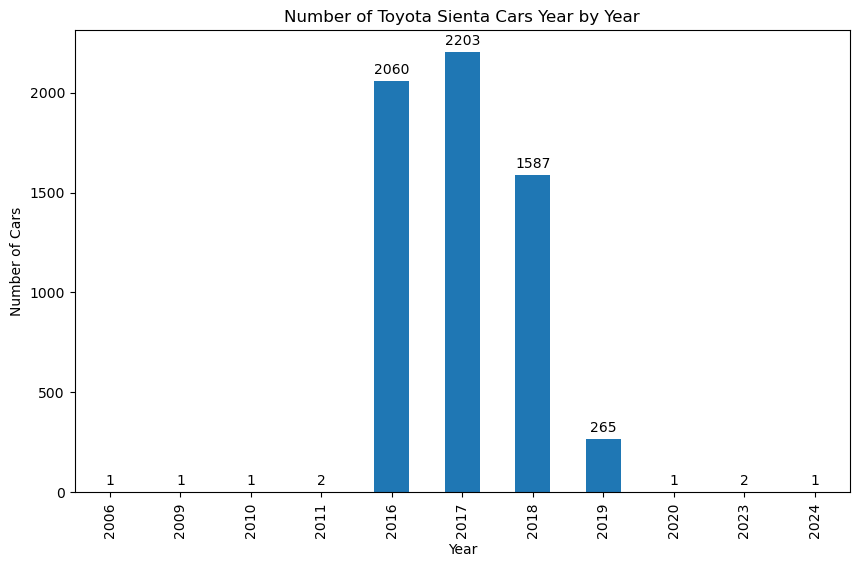

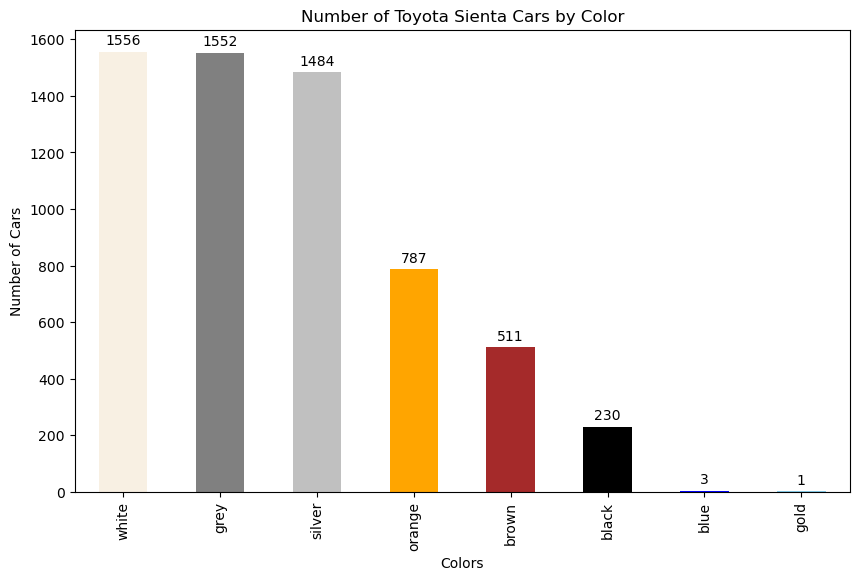

In [13]:
# Convert the 'date_reg' column to datetime format if it exists
if 'date_reg' in all_data.columns:
    all_data['date_reg'] = pd.to_datetime(all_data['date_reg'])

# Filter the data for maker = Toyota and model = Sienta
filtered_data = all_data[(all_data['maker'] == 'Toyota') & (all_data['model'] == 'Sienta')]

# Group by year and count the occurrences
yearly_data = filtered_data.groupby(filtered_data['date_reg'].dt.year).size()

# Plot the data in a bar chart with labels
plt.figure(figsize=(10, 6))
bars = yearly_data.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Number of Toyota Sienta Cars Year by Year')

# Add labels on top of the bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.show()

# Group by colour and count the occurrences
color_data = filtered_data['colour'].value_counts()

# Define a color map based on common color names
color_map = {
    'red': 'red',
    'blue': 'blue',
    'green': 'green',
    'black': 'black',
    'white': '#F8F0E3',
    'silver': 'silver',
    'grey': 'grey',
    'yellow': 'yellow',
    'orange': 'orange',
    'brown': 'brown',
    # Add more colors if needed
}

# Get colors for the bars based on the color names
bar_colors = [color_map.get(color.lower(), 'skyblue') for color in color_data.index]

# Plot the data in a bar chart with colors matching the names
plt.figure(figsize=(10, 6))
bars_colored = color_data.plot(kind='bar', color=bar_colors)
plt.xlabel('Colors')
plt.ylabel('Number of Cars')
plt.title('Number of Toyota Sienta Cars by Color')

# Add labels on top of the bars
for bar in bars_colored.patches:
    bars_colored.annotate(format(bar.get_height(), '.0f'),
                          (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                          ha='center', va='center',
                          size=10, xytext=(0, 8),
                          textcoords='offset points')

plt.show()
